# Regresión Lineal

### Docente: M.Sc. Richard Fernández

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('D:/Bases/Otros/Ventas.csv',sep=";")

In [3]:
data.head(5)

,Ventas,Radio,TV,Diarios
0,551,80,35,70
1,547,58,35,88
2,382,63,21,58
3,453,73,36,64
4,387,64,16,69


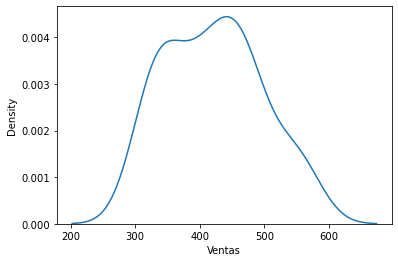

In [4]:
sns.kdeplot(data.Ventas)
plt.show()

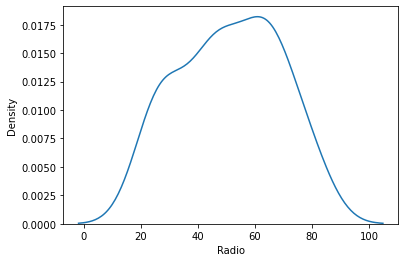

In [5]:
sns.kdeplot(data.Radio)
plt.show()

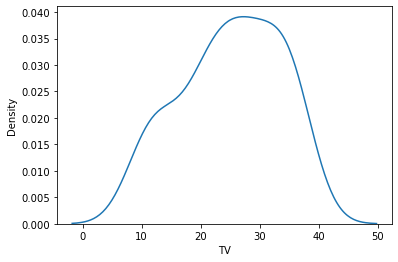

In [6]:
sns.kdeplot(data.TV)
plt.show()

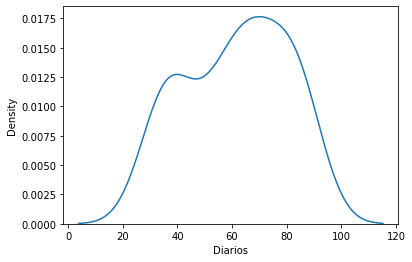

In [7]:
sns.kdeplot(data.Diarios)
plt.show()

In [8]:
#Prueba de normalidad
ss.shapiro(data['Ventas'])

ShapiroResult(statistic=0.9536961317062378, pvalue=0.08139657974243164)

In [9]:
#Prueba de normalidad
ss.shapiro(data['Radio'])

ShapiroResult(statistic=0.9463553428649902, pvalue=0.04393230006098747)

In [10]:
#Prueba de normalidad
ss.shapiro(data['TV'])

ShapiroResult(statistic=0.9397193193435669, pvalue=0.025393284857273102)

In [11]:
#Prueba de normalidad
ss.shapiro(data['Diarios'])

ShapiroResult(statistic=0.9332762360572815, pvalue=0.01508260052651167)

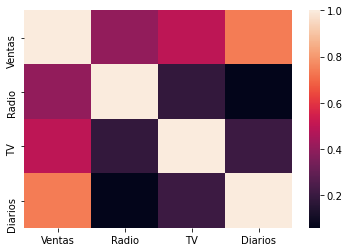

In [13]:
#Heatmap
sns.heatmap(data.loc[:,['Ventas','Radio','TV','Diarios']].corr(method = "spearman"))
plt.show()

In [ ]:
#linealidad

#Multicolinealidad

In [14]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

In [15]:
data.loc[:,['Ventas','Radio','TV','Diarios']].corr(method = "spearman")

,Ventas,Radio,TV,Diarios
Ventas,1.000000,0.404255,0.499225,0.741982
Radio,0.404255,1.000000,0.186254,0.059299
TV,0.499225,0.186254,1.000000,0.208621
Diarios,0.741982,0.059299,0.208621,1.000000


In [16]:
ss.spearmanr(data['Ventas'],data['Radio'])

SpearmanrResult(correlation=0.4042545567808915, pvalue=0.007175504487928522)

In [17]:
ss.spearmanr(data['Ventas'],data['TV'])

SpearmanrResult(correlation=0.49922517771463226, pvalue=0.0006546986013042753)

In [18]:
ss.spearmanr(data['Ventas'],data['Diarios'])

SpearmanrResult(correlation=0.7419818173372642, pvalue=1.244025397405954e-08)

In [19]:
ss.spearmanr(data['Radio'],data['TV'])

SpearmanrResult(correlation=0.1862535043498252, pvalue=0.23175322515474867)

In [20]:
ss.spearmanr(data['Radio'],data['Diarios'])

SpearmanrResult(correlation=0.0592992943049514, pvalue=0.7056342575130212)

In [21]:
ss.spearmanr(data['TV'],data['Diarios'])

SpearmanrResult(correlation=0.20862051388195071, pvalue=0.17942380987207668)

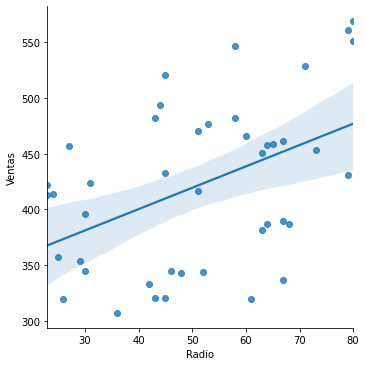

In [22]:
sns.lmplot(x='Radio',y='Ventas',data=data)
plt.show()

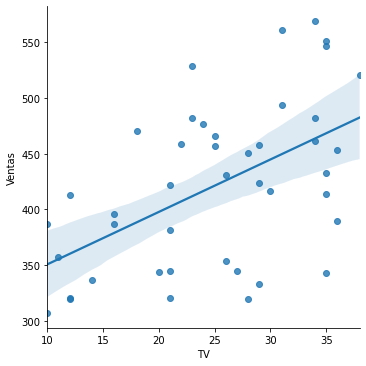

In [23]:
sns.lmplot(x='TV',y='Ventas',data=data)
plt.show()

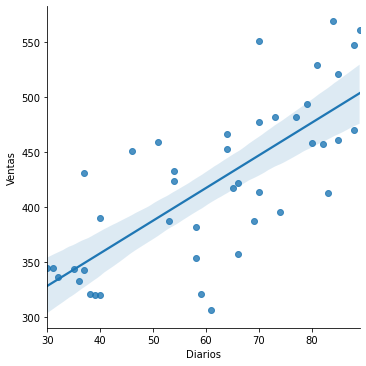

In [24]:
sns.lmplot(x='Diarios',y='Ventas',data=data)
plt.show()

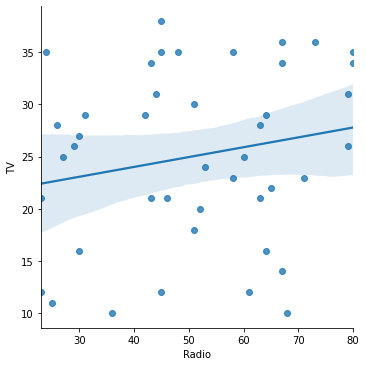

In [25]:
sns.lmplot(x='Radio',y='TV',data=data)
plt.show()

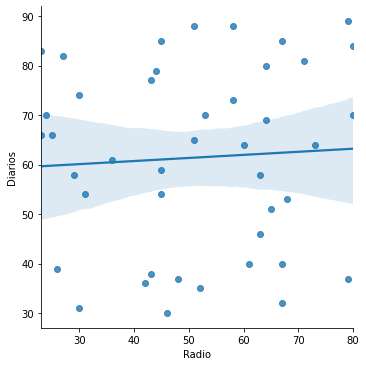

In [26]:
sns.lmplot(x='Radio',y='Diarios',data=data)
plt.show()

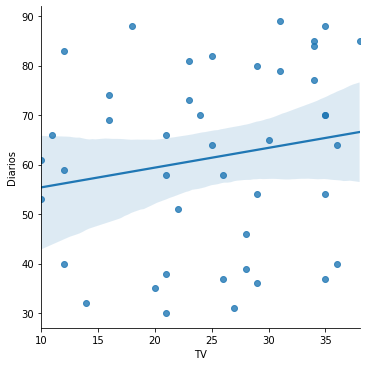

In [27]:
sns.lmplot(x='TV',y='Diarios',data=data)
plt.show()

In [28]:
#Regresión Lineal
modelo = smf.ols('Ventas ~ Radio + TV + Diarios', data=data).fit()

In [29]:
print(modelo.summary())
#1.Coeficiente de determinación
# R-squared: 0.829 => El modelo más adecuado será el que tenga un R-squared cercano 1
# Adj. R-squared: 0.816 => El modelo más adecuado será el que tenga un R-squared cercano 1

#2.Prueba ANOVA
#Ho: b0=b1=b2=b3=0
#Ha: al menos un bi != 0

#Prob (F-statistic): 5.09e-15 => Como el pvalor < 5%, al 95% de confianza el modelo es significativo

#3.Prueba t para coeficientes
#Ho: bi=0
#Ha: bi!=0

#4.Supuestos del modelo

#a.Linealidad => Ventas vs Radio, Ventas vs TV, Ventas vs Diarios => ok

#b.Independencia de errores => DW:1.716, como este valor se encuentra entre 1.5 y 2.5 se cumple el supuesto => ok

#c.Homocedasticidad => tarea

#d.Normalidad de errores => Prob(JB):0.362, al 95%, los erroes se aproximan a un distribución normal => ok

#e.Multicolinealidad => Radio vs TV, Radio vs Diarios, TV vs Diarios => ok

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     63.06
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           5.09e-15
Time:                        19:48:50   Log-Likelihood:                -207.61
No. Observations:                  43   AIC:                             423.2
Df Residuals:                      39   BIC:                             430.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.5435     23.643      4.591      0.0

In [30]:
modelo.params
#Ventas = 108.543492 + 1.464563Radio + 3.035945TV + 2.639268Diarios

Intercept    108.543492
Radio          1.464563
TV             3.035945
Diarios        2.639268
dtype: float64

In [31]:
modelo.mse_resid

#A menor valor, el modelo es más adecuado

1008.1736046816453

In [ ]:
#Tarea
#1. Hacer uso de una muestra de train y test
#2. Validad el supuesto de homocedasticidad